# Feature Groups

---

The Hopsworks feature store is a centralized repository, within an organization, to manage machine learning features.
A feature store is not a pure storage service, it goes hand-in-hand with feature computation. 

A feature is a measurable property of a phenomenon. It could be a simple value such as the age of a customer, or it could be an aggregated value, such as the number of transactions made by a customer in the last 30 days.

A feature is not restricted to an numeric value, it could be a string representing an address, or an image.



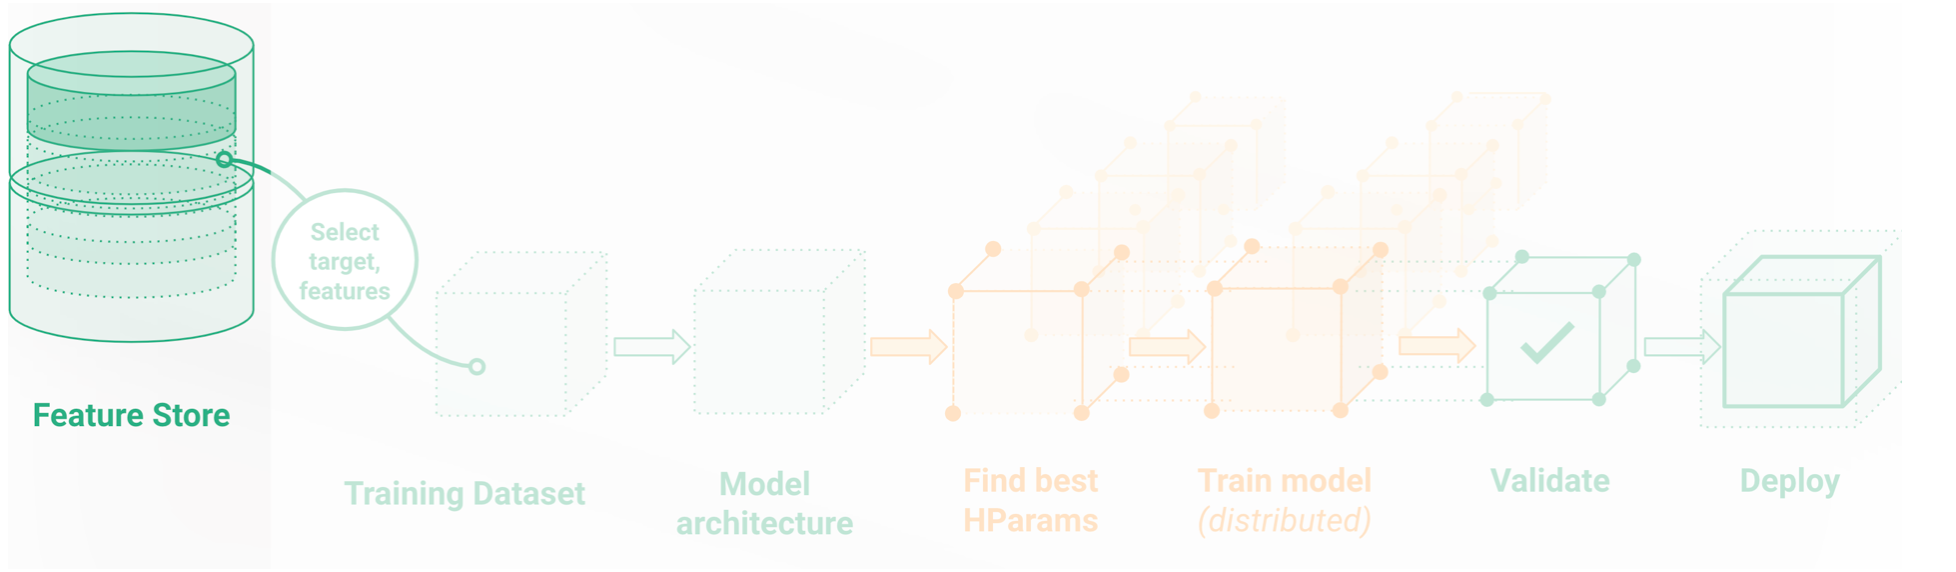

In this series of tutorials, we will work with data related to Daily Electricity Price and Demand. The end goal is to train and serve a model on the Hopsworks platform that can predict a electricity demand.

In this particular notebook you will learn how to:

- Connect to the Hopsworks feature store.

- Create feature groups and upload them to the feature store.

---

# Data Exploration and Feature Engineering

This part of tutorial consist of next steps:

- Importing Libraries.

- Loading Data.

- Basic exploration.

- Feature Engineering

### 📝 Importing Libraries

First of all, let's import necessary libraries.

- `Pandas` in order to work with data.

- `Matplotlib.pyplot` in order to visualize data.

- `hdfs` - Hadoop File System in order to access data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from hops import hdfs

import warnings
warnings.filterwarnings('ignore')

---

## ⬇️ Loading Datasets

We can check project name using `hdfs.project_name()` method.

In [2]:
project_name = hdfs.project_name()
project_name

'Electricity_demand'

#### ⛳️ Electricity Dataset

In [3]:
df_electricity = pd.read_csv(f'hdfs:///Projects/{project_name}/Jupyter/data/electricity.csv',index_col = 0)
df_electricity.head()

,date,RRP,frac_at_neg_RRP,demand,RRP_positive,demand_neg_RRP,RRP_negative,demand_pos_RRP
0,2015-01-01,25.633696,0.020833,99635.030,26.415953,2315.790,-7.240000,97319.240
1,2015-01-02,33.138988,0.062500,129606.010,38.837661,8523.995,-47.809777,121082.015
2,2015-01-03,34.564855,0.000000,142300.540,34.564855,0.000,0.000000,142300.540
3,2015-01-04,25.005560,0.000000,104330.715,25.005560,0.000,0.000000,104330.715
4,2015-01-05,26.724176,0.000000,118132.200,26.724176,0.000,0.000000,118132.200


In [4]:
df_electricity.describe()

,RRP,frac_at_neg_RRP,demand,RRP_positive,demand_neg_RRP,RRP_negative,demand_pos_RRP
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,76.079554,0.008547,120035.476503,76.553847,783.171448,-2.686052,119252.305055
std,130.246805,0.039963,13747.993761,130.114184,3578.920686,19.485432,14818.631319
min,-6.076028,0.000000,85094.375000,13.568986,0.000000,-342.220000,41988.240000
25%,38.707040,0.000000,109963.650000,39.117361,0.000000,0.000000,109246.250000
50%,66.596738,0.000000,119585.912500,66.869058,0.000000,0.000000,119148.082500
75%,95.075012,0.000000,130436.006250,95.130181,0.000000,0.000000,130119.477500
max,4549.645105,0.625000,170653.840000,4549.645105,57597.595000,0.000000,170653.840000


In [5]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   RRP              2106 non-null   float64
 2   frac_at_neg_RRP  2106 non-null   float64
 3   demand           2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   demand_pos_RRP   2106 non-null   float64
dtypes: float64(7), object(1)
memory usage: 148.1+ KB


In [6]:
df_electricity.isna().sum()[df_electricity.isna().sum() > 0]

Series([], dtype: int64)

#### ⛳️ Weather Dataset

In [7]:
df_weather = pd.read_csv(f'hdfs:///Projects/{project_name}/Jupyter/data/weather.csv',index_col = 0)
df_weather.head()

,date,min_temperature,max_temperature,solar_exposure,rainfall
0,2015-01-01,13.3,26.9,23.6,0.0
1,2015-01-02,15.4,38.8,26.8,0.0
2,2015-01-03,20.0,38.2,26.5,0.0
3,2015-01-04,16.3,21.4,25.2,4.2
4,2015-01-05,15.0,22.0,30.7,0.0


In [8]:
df_weather.describe()

,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2105.000000,2103.000000
mean,11.582289,20.413200,14.743373,1.505944
std,4.313711,6.288693,7.945527,4.307897
min,0.600000,9.000000,0.700000,0.000000
25%,8.500000,15.525000,8.200000,0.000000
50%,11.300000,19.100000,12.700000,0.000000
75%,14.600000,23.900000,20.700000,0.800000
max,28.000000,43.500000,33.300000,54.600000


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   min_temperature  2106 non-null   float64
 2   max_temperature  2106 non-null   float64
 3   solar_exposure   2105 non-null   float64
 4   rainfall         2103 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.7+ KB


In [10]:
df_weather.isna().sum()[df_weather.isna().sum() > 0]

solar_exposure    1
rainfall          3
dtype: int64

In [11]:
df_weather.dropna(inplace = True)

In [12]:
df_weather.isna().sum()[df_weather.isna().sum() > 0]

Series([], dtype: int64)

#### ⛳️ Calendar Dataset

In [13]:
df_calendar = pd.read_csv(f'hdfs:///Projects/{project_name}/Jupyter/data/calendar.csv',index_col = 0)
df_calendar.head()

,date,school_day,holiday
0,2015-01-01,N,Y
1,2015-01-02,N,N
2,2015-01-03,N,N
3,2015-01-04,N,N
4,2015-01-05,N,N


In [14]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2106 non-null   object
 1   school_day  2106 non-null   object
 2   holiday     2106 non-null   object
dtypes: object(3)
memory usage: 65.8+ KB


---

### 🕵🏻‍♂️ Basic Exploration

In [15]:
df_electricity.date = pd.to_datetime(df_electricity.date)
df_electricity.dtypes

date               datetime64[ns]
RRP                       float64
frac_at_neg_RRP           float64
demand                    float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
demand_pos_RRP            float64
dtype: object

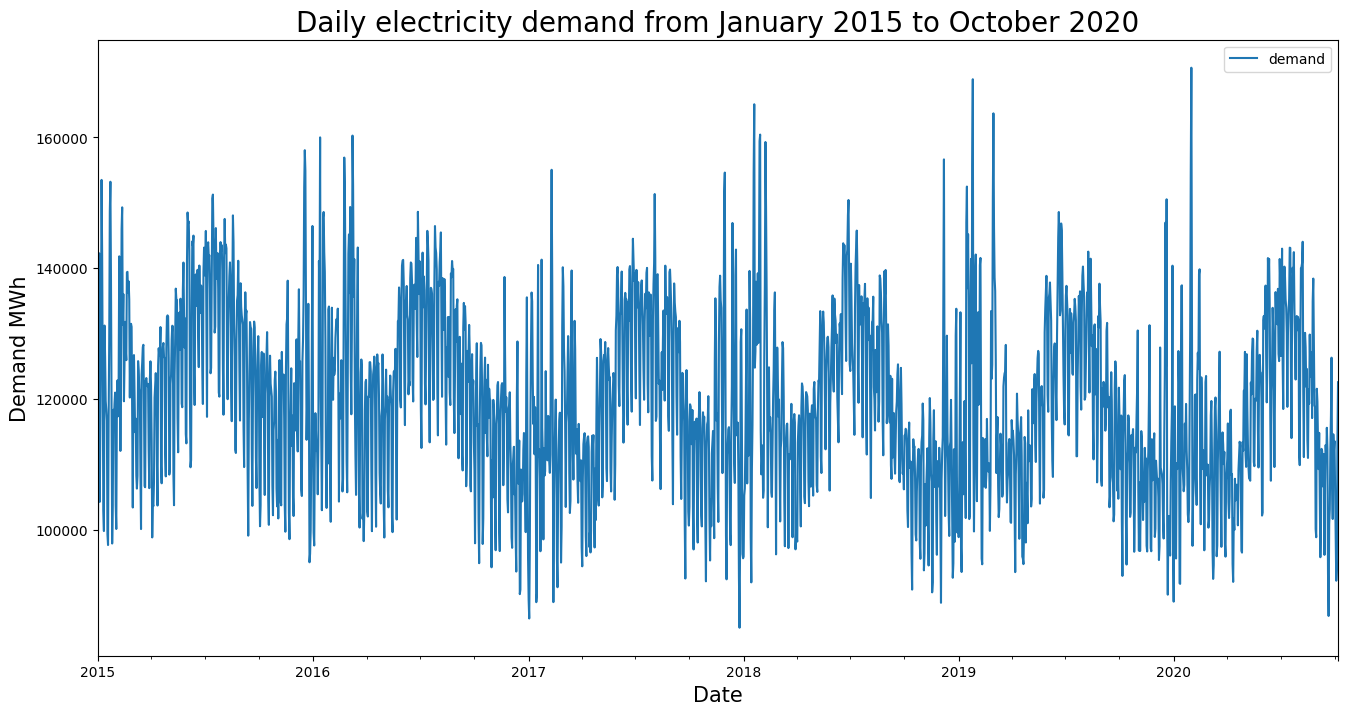

In [16]:
fig,ax = plt.subplots(figsize = (16,8))

df_electricity.plot('date','demand', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Demand MWh',fontsize = 15)
ax.set_title('Daily electricity demand from January 2015 to October 2020',fontsize = 20)

plt.show()

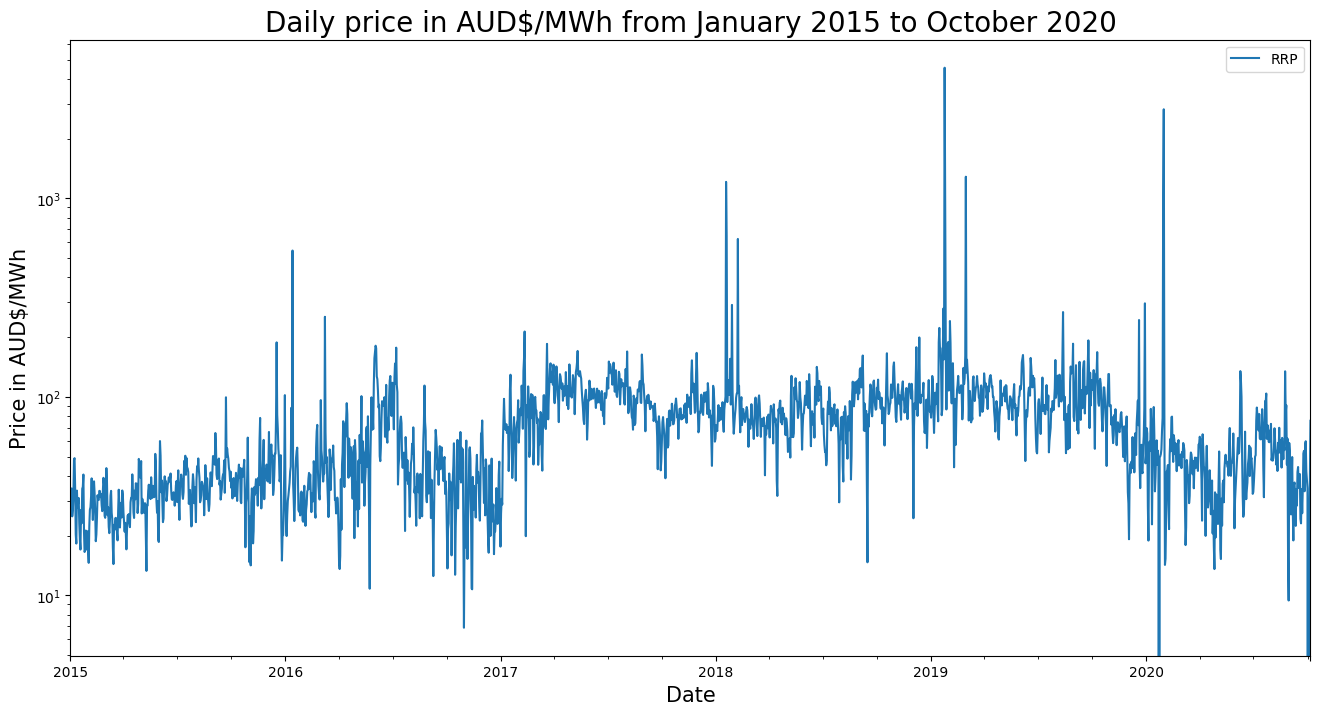

In [17]:
fig,ax = plt.subplots(figsize = (16,8))

df_electricity.plot('date','RRP', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Price in AUD$/MWh',fontsize = 15)
ax.set_title('Daily price in AUD$/MWh from January 2015 to October 2020',fontsize = 20)

plt.yscale("log")
plt.show()

In [18]:
df_weather.date = pd.to_datetime(df_weather.date)
df_weather.dtypes

date               datetime64[ns]
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
dtype: object

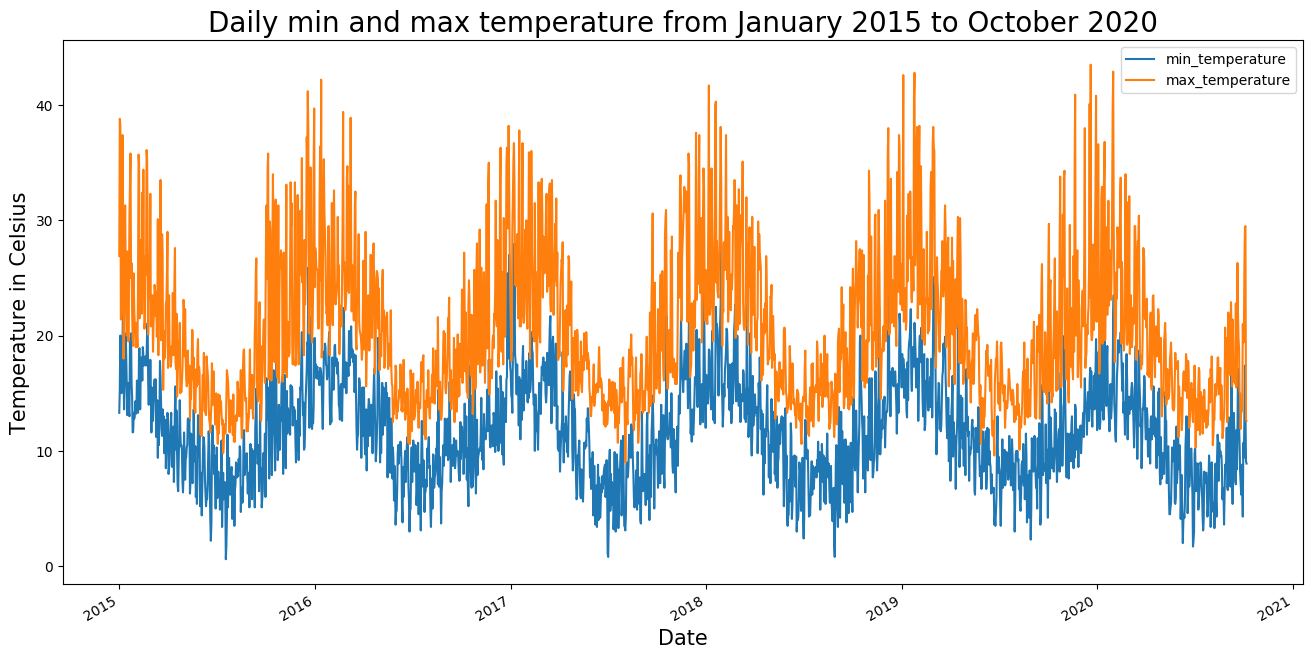

In [19]:
fig,ax = plt.subplots(figsize = (16,8))

df_weather.plot('date','min_temperature', ax = ax)
df_weather.plot('date','max_temperature', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Temperature in Celsius',fontsize = 15)
ax.set_title('Daily min and max temperature from January 2015 to October 2020',fontsize = 20)

plt.show()

### 🧑🏻‍🔬 Feature Engineering

In [20]:
df_calendar[['holiday','school_day']] = df_calendar[['holiday','school_day']].apply(lambda x: x.map({'Y': 1, 'N': 0}))

df_weather['day_of_week'] = df_weather.date.dt.dayofweek
df_weather['day_of_month'] = df_weather.date.dt.day
df_weather['day_of_year'] = df_weather.date.dt.dayofyear
df_weather['week_of_year'] = df_weather.date.dt.weekofyear
df_weather['month'] = df_weather.date.dt.month
df_weather['quarter'] = df_weather.date.dt.quarter
df_weather['year'] = df_weather.date.dt.year

df_weather.head()

,date,min_temperature,max_temperature,solar_exposure,rainfall,day_of_week,day_of_month,day_of_year,week_of_year,month,quarter,year
0,2015-01-01,13.3,26.9,23.6,0.0,3,1,1,1,1,1,2015
1,2015-01-02,15.4,38.8,26.8,0.0,4,2,2,1,1,1,2015
2,2015-01-03,20.0,38.2,26.5,0.0,5,3,3,1,1,1,2015
3,2015-01-04,16.3,21.4,25.2,4.2,6,4,4,1,1,1,2015
4,2015-01-05,15.0,22.0,30.7,0.0,0,5,5,2,1,1,2015


In [21]:
windows = [7,14,30]

for window in windows:
    df_electricity[f'demand_{window}_mean'] = df_electricity.demand.rolling(window = window).mean()
    df_electricity[f'demand_{window}_std'] = df_electricity.demand.rolling(window = window).std()
    
df_electricity = df_electricity.dropna()

df_electricity[['date','demand_7_mean','demand_7_std','demand_14_mean','demand_14_std','demand_30_mean','demand_30_std']].head()

,date,demand_7_mean,demand_7_std,demand_14_mean,demand_14_std,demand_30_mean,demand_30_std
29,2015-01-30,113361.206429,8840.007476,119750.684643,17637.057172,121135.323333,16463.479261
30,2015-01-31,111577.260714,9388.612319,120068.660357,17277.849041,121274.921333,16291.746026
31,2015-02-01,111894.315000,8875.547703,120243.666786,17045.002549,120294.015667,16654.688684
32,2015-02-02,114026.412143,8377.113294,120373.024643,17024.396712,119507.136333,16128.447829
33,2015-02-03,114667.386429,8920.937447,119938.167857,16864.969397,120125.450167,15880.221937


> **Important thing**: It's necessary to convert all `datetime` features to `strings`, because Spark has problems with `datetime` features of Pandas DataFrames. 

In [22]:
df_electricity.date = df_electricity.date.astype('str')
df_weather.date = df_weather.date.astype('str')

df_electricity.dtypes

date                object
RRP                float64
frac_at_neg_RRP    float64
demand             float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
demand_pos_RRP     float64
demand_7_mean      float64
demand_7_std       float64
demand_14_mean     float64
demand_14_std      float64
demand_30_mean     float64
demand_30_std      float64
dtype: object

---

# 🔮 Creating Feature Groups

A `Feature Groups` is a logical grouping of features, and experience has shown, that this grouping generally originates from the features being derived from the same data source. The `Feature Group` lets you save metadata along features, which defines how the Feature Store interprets them, combines them and reproduces training datasets created from them.

Generally, the features in a feature group are engineered together in an ingestion job. However, it is possible to have additional jobs to append features to an existing feature group. Furthermore, `feature groups` provide a way of defining a namespace for features, such that you can define features with the same name multiple times, but uniquely identified by the group they are contained in.

> It is important to note that `feature groups` are not groupings of features for immediate training of Machine Learning models. Instead, to ensure reusability of features, it is possible to combine features from any number of groups into training datasets.

To begin with, lets import `hsfs` library.

- `hsfs` - Hopsworks Feature Store library in order to interact with the Hopsworks Feature Store.

The next step is to establish a connection with our Hopsworks Feature Store instance and retrieve the object that represents the Feature Store we are working with.

> By default `connection.get_feature_store()` returns the feature store of the project we are working with. However, it accepts also a project name as parameter to select a different feature store.

In [23]:
import hsfs

# Create a connection
connection = hsfs.connection()

# Get the feature store handle for the project's feature store
fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


> In addition we can check Feature Store's metadata such as name and description.

In [24]:
print(f'Feature Store Name: {fs.name}')
print(f'Feature Store Description: {fs.description}')

Feature Store Name: electricity_demand_featurestore
Feature Store Description: Featurestore database for project: Electricity_demand


### ⛳️ Creating *Weather* Feature Group

In [ ]:
weather_fg = fs.create_feature_group(
    name = 'weather_fg',
    description = 'Daily weather conditions',
    version = 1,
    primary_key = ['index'],
    online_enabled = True
#   ,event_time = 'date'
)

weather_fg.save(df_weather.reset_index())

### ⛳️ Creating *Calendar* Feature Group

In [ ]:
calendar_fg = fs.create_feature_group(
    name = 'calendar_fg',
    description = 'Characteristics of each day',
    version = 1,
    primary_key = ['index'],
    online_enabled = True
#   ,event_time = 'date'
)

calendar_fg.save(df_calendar.reset_index())

### ⛳️ Creating *Electricity* Feature Group

In [ ]:
electricity_fg = fs.create_feature_group(
    name = 'electricity_fg',
    description = 'Daily Electricity Price and Demand',
    version = 1,
    primary_key = ['index'],
    online_enabled = True
#   ,event_time = 'date'
)

electricity_fg.save(df_electricity.reset_index())

Here we have also set `online_enabled=True`, which enables low latency access to the data. A full list of arguments can be found in the [documentation](https://docs.hopsworks.ai/feature-store-api/latest/generated/api/feature_store_api/#create_feature_group).

At this point, we have only specified some metadata for the feature group. It does not store any data or even have a schema defined for the data.

To make the feature group persistent we populate it with its associated data using the `save` function.

> Now you should  be able to inspect the feature group in the Hopsworks UI.

---

### Next Steps

In the next notebook we will use our feature groups to create a dataset we can train a model on.